In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
num_humans = [5, 7, 10, 15]
test_sizes = ['500', '999', '2500', '5000']
test_sizes_1 = ['500', '1000', '2500', '5000']
datasets = {'cifar10h':'cnn_data','imagenet':'imagenet_data'}
markers = ['o', 's', 'D']

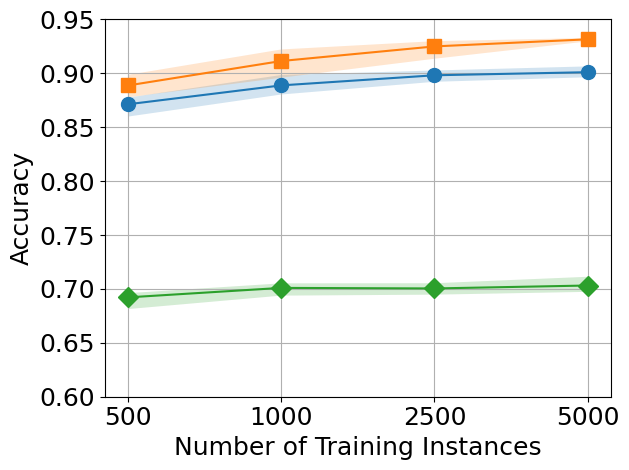

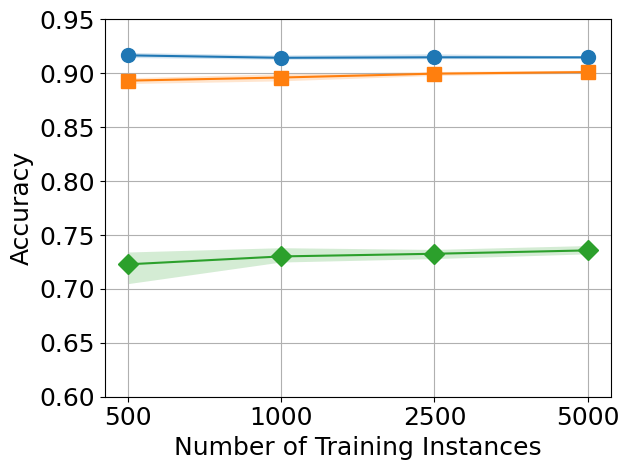

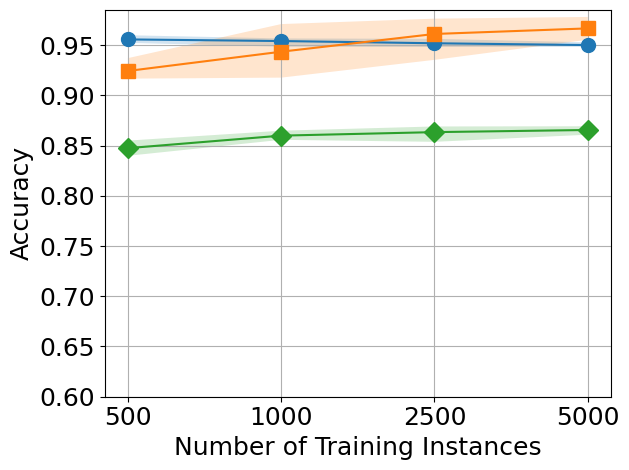

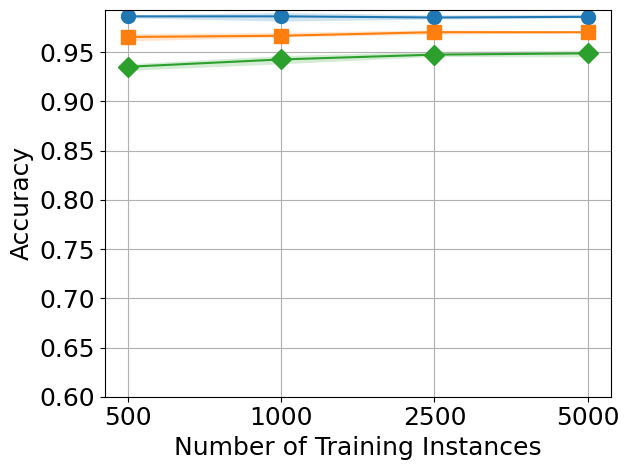

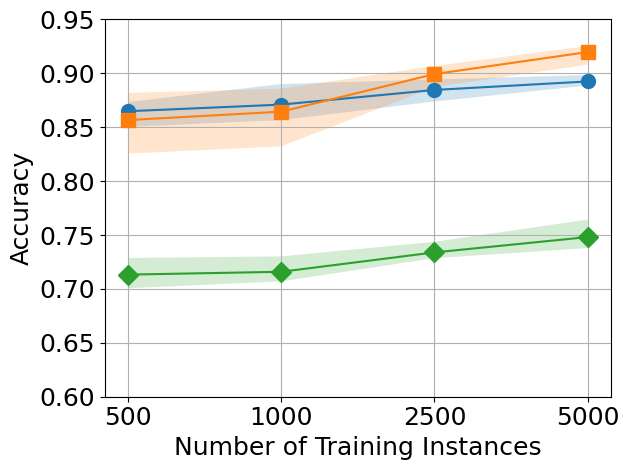

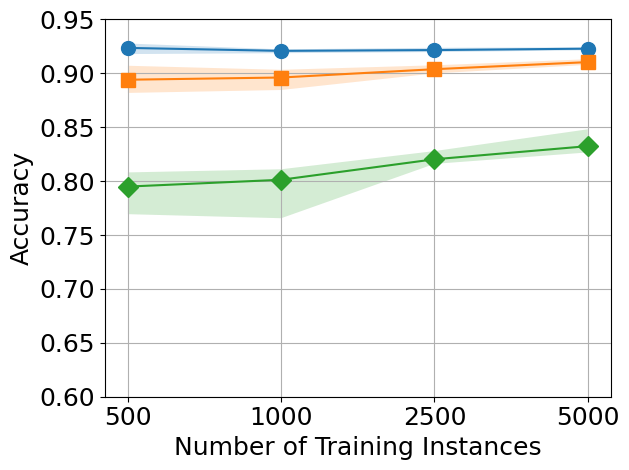

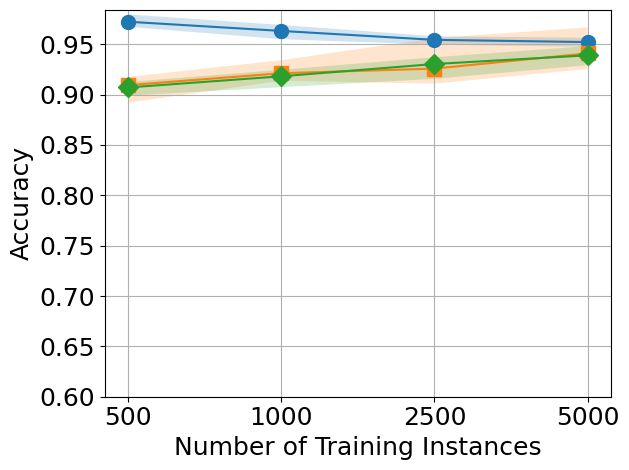

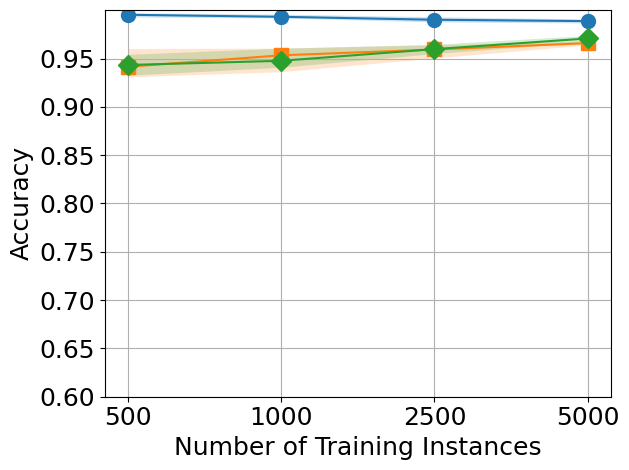

In [52]:
accuracy_data = []
for dataset,filename in datasets.items():
    for num_human in num_humans:
        avg_test_size_data = []
        min_test_size_data = []
        max_test_size_data = []
        labels = []
        for test_size in test_sizes:
            data = pd.read_csv(f"{dataset}/accuracy/{num_human}_{filename}_accuracy_{test_size}.csv")
            labels = data.columns
            data = data[1:].to_numpy()
            avg_test_size_data.append(np.mean(data, axis=0))
            min_test_size_data.append(np.min(data, axis=0))
            max_test_size_data.append(np.max(data, axis=0))
        avg_test_size_data = np.transpose(np.array(avg_test_size_data))
        min_test_size_data = np.transpose(np.array(min_test_size_data))
        max_test_size_data = np.transpose(np.array(max_test_size_data))
        labels= labels[2:]
        avg_test_size_data = avg_test_size_data[2:]
        min_test_size_data = min_test_size_data[2:]
        max_test_size_data = max_test_size_data[2:]
        accuracy_data.append(avg_test_size_data)
        plt.figure()
        for i in range(3):
            plt.plot(test_sizes_1, avg_test_size_data[i], label=labels[i], marker=markers[i], markersize=10)
            plt.fill_between(test_sizes_1, min_test_size_data[i], max_test_size_data[i], alpha=0.2)
        plt.xlabel('Number of Training Instances', fontsize=18)
        plt.ylabel('Accuracy', fontsize=18)
        plt.yticks(np.arange(0.6, 1.0, step=0.05), fontsize=18)
        plt.xticks(fontsize=18)
        # plt.title(f'{dataset} {num_human} Humans')
        # plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'plots/accuracy{num_human}_{dataset}.png')
        plt.show()
        plt.close()

In [53]:
algos = ['pseudo_lb', 'greedy', 'linear_program']
test_sizes = ['500', '999', '2500', '5000']
test_sizes_1 = ['500', '1000', '2500', '5000']
num_humans = [5, 7, 10, 15]
num_classes = {'cifar10h':10, 'imagenet':16}
markers = ['o', 's', 'D']

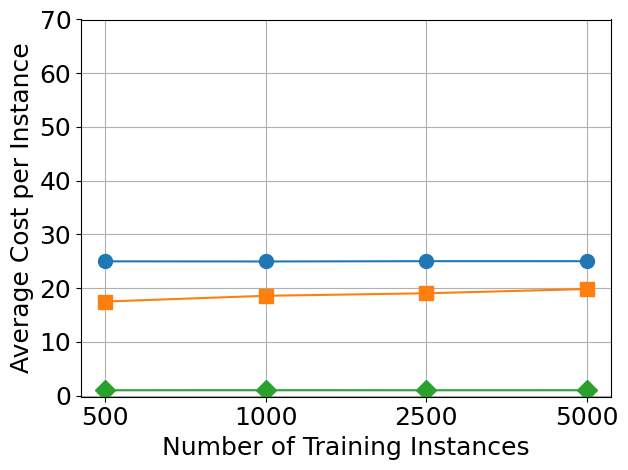

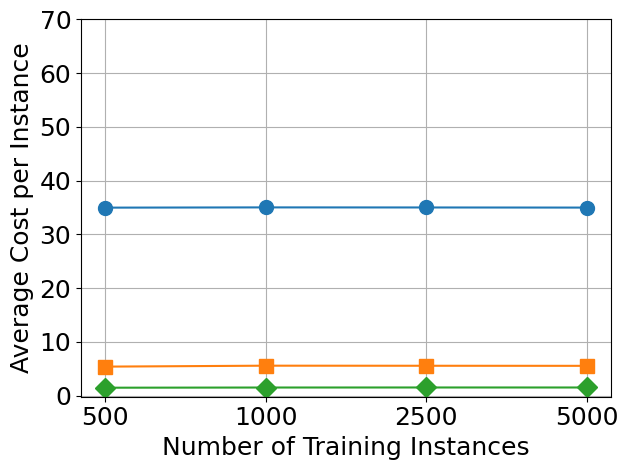

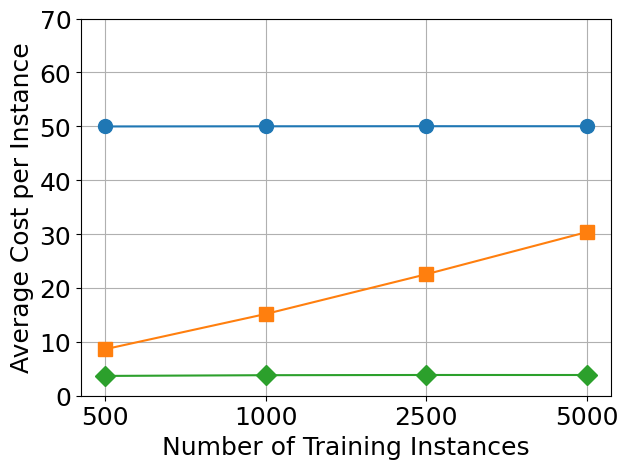

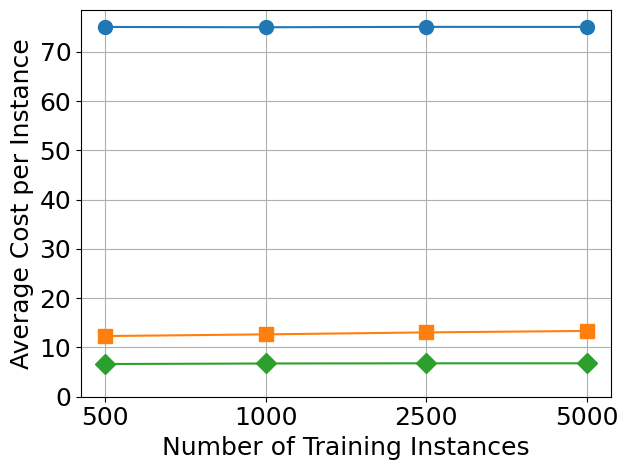

FileNotFoundError: [Errno 2] No such file or directory: 'imagenet/subset_cost/5_500_pseudo_lb.csv'

In [71]:
cost_data = []
for dataset in datasets.keys():
    for num_human in num_humans:
        algo_data = []
        for algo in algos:
            test_size_data = []
            for test_size in test_sizes:
                data = pd.read_csv(f"{dataset}/subset_cost/{num_human}_{test_size}_{algo}.csv")
                data = np.mean(data.to_numpy(), axis=0)
                test_size_data.append(data[0])
            algo_data.append(test_size_data)
        cost_data.append(algo_data)
        plt.figure()
        for i in range(len(algo_data)):
            plt.plot(test_sizes_1, algo_data[i], label=algos[i], marker=markers[i], markersize=10)
        plt.xlabel('Number of Training Instances', fontsize=18)
        plt.ylabel('Average Cost per Instance', fontsize=18)
        plt.yticks(np.arange(0, 80, step=10), fontsize=18)
        plt.xticks(fontsize=18)
        # plt.title(f'{dataset} {num_human} Humans')
        # plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'plots/cost{num_human}_{dataset}.png')
        plt.show()
        plt.close()

In [ ]:
for i in range(len(accuracy_data)):
    plt.figure()
    for j in range(3):
        plt.plot(test_sizes, accuracy_data[i][j]/cost_data[i][j], label=algos[j], marker=markers[j], markersize=8)
    plt.xlabel('Test Size')
    plt.ylabel('Accuracy Per Unit Cost')
    d_in = 0 if i < 4 else 1
    h_in = i if i < 4 else i%4
    plt.title(f'{list(datasets.keys())[d_in]} {num_humans[h_in]} Humans')
    plt.legend()
    plt.grid(True)
    plt.show()
    # plt.savefig(f'output/plots/accuracy_cost_{datasets[i%2]}_{num_humans[i//5]}_{algos[j-1]}.png')
    plt.close()

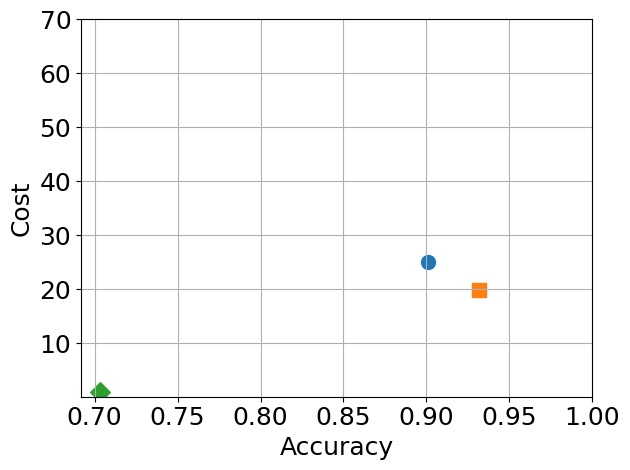

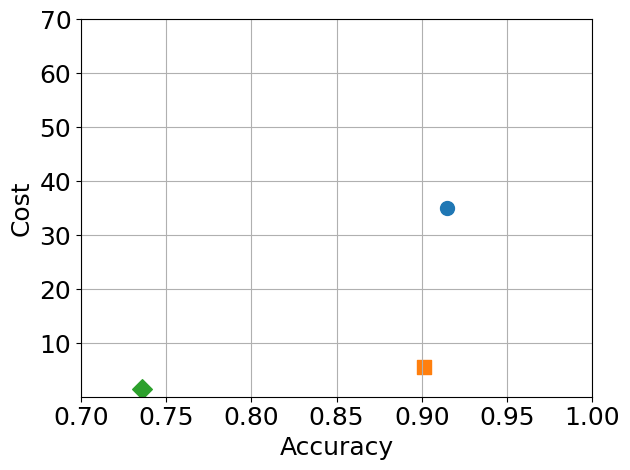

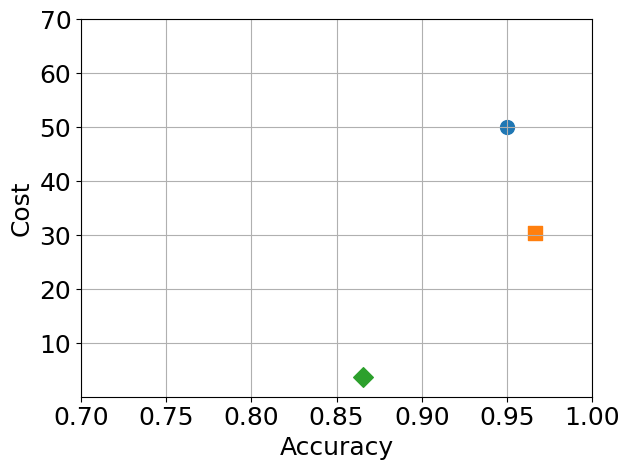

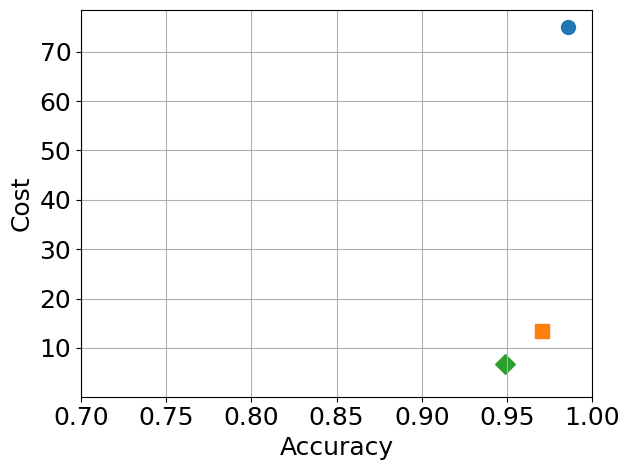

IndexError: list index out of range

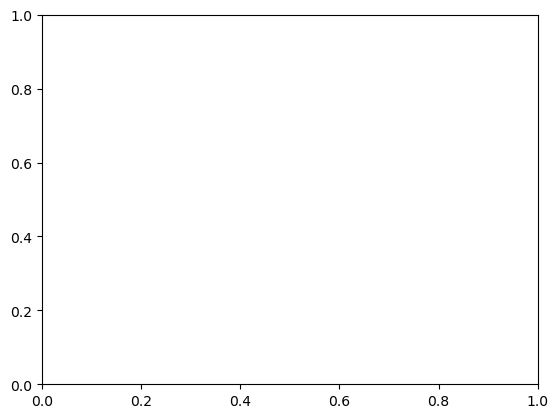

In [95]:
def distances_from_ideal(acc_list, cost_list):
    distances = [np.sqrt((1-acc)**2 + cost**2) for acc, cost in zip(acc_list, cost_list)]
    return distances

def points_from_ideal(acc_list, cost_list):
    points = [(acc, cost) for acc, cost in zip(acc_list, cost_list)]
    return points

for i in range(len(accuracy_data)):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for j in range(3):
        #plot points and the ideal point (1,0)
        point = points_from_ideal(accuracy_data[i][j], cost_data[i][j])[-1] # i decides a dataset and number of humans, j decides algorithm
        ax.scatter(point[0], point[1], marker=markers[j], label=algos[j], s=100)
    # plt.plot(1, 0, 'go')

    plt.xlabel('Accuracy', fontsize = 18)
    plt.ylabel('Cost', fontsize = 18)
    plt.xticks(np.arange(0.7, 1.0, step=0.05),fontsize=18)
    plt.yticks(np.arange(0, 80, step=10), fontsize=18)
    d_in = 0 if i < 4 else 1
    h_in = i if i < 4 else i%4
    ax.set_ylim(0.1)
    # plt.title(f'{list(datasets.keys())[d_in]} {num_humans[h_in]} Humans')
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'plots/{list(datasets.keys())[d_in]}_{num_humans[h_in]}_Humans.png')
    plt.show()
    plt.close()

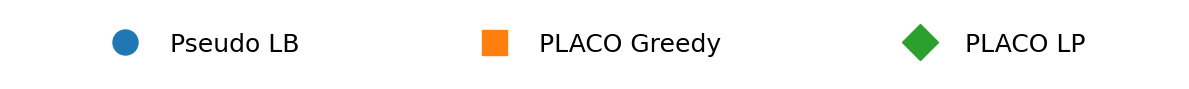

In [157]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 1))

# Plot some dummy data
ax[2].plot([], [], 'D', label='PLACO LP', color='tab:green', markersize=18,)
ax[1].plot([], [], 's', label='PLACO Greedy', color='tab:orange', markersize=18)
ax[0].plot([], [], 'o', label='Pseudo LB', color='tab:blue', markersize=18)

for a in ax:
    a.legend(loc='center', frameon=False, fontsize=18)
    a.set_axis_off()

plt.tight_layout()

plt.show()


/var/folders/7m/51cswqps6c30dzq0vq0cyrbh0000gn/T/ipykernel_55796/946973845.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


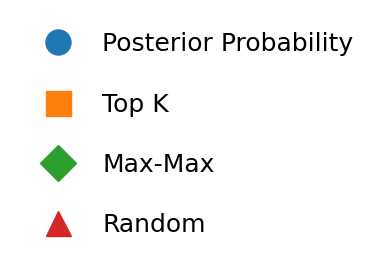

In [170]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(1, 3))

# Plot some dummy data
ax[0].plot([], [], 'o', label='Posterior Probability', color='tab:blue', markersize=18)
ax[1].plot([], [], 's', label='Top K', color='tab:orange', markersize=18)
ax[2].plot([], [], 'D', label='Max-Max', color='tab:green', markersize=18)
ax[3].plot([], [], '^', label='Random', color='tab:red', markersize=18)

for a in ax:
    a.legend(loc='upper left', frameon=False, fontsize=18)
    a.set_axis_off()

plt.tight_layout()

plt.show()
